<a href="https://colab.research.google.com/github/Shree008/Data-Analysis1/blob/main/RetailSalesData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [5]:
df=pd.read_csv("RetailSalesData.csv")
print(df.head)

<bound method NDFrame.head of   InvoiceID        Date   CustomerName       Product     Category  Quantity  \
0   INV1001  2024-05-01   Anita Sharma        LED TV  Electronics         1   
1   INV1002  2024-05-01    Rahul Mehta       T-shirt     Clothing         2   
2   INV1003  2024-05-02    Sneha Reddy       Blender   Appliances         1   
3   INV1004  2024-05-03   Rajiv Kapoor        Laptop  Electronics         1   
4   INV1005  2024-05-03     Meera Iyer       Handbag  Accessories         1   
5   INV1006  2024-05-04      Kiran Das         Jeans     Clothing         3   
6   INV1007  2024-05-04      Sunil Rao    Smartphone  Electronics         2   
7   INV1008  2024-05-05    Nisha Patel     Microwave   Appliances         1   
8   INV1009  2024-05-06      Ajay Nair         Shoes     Footwear         2   
9   INV1010  2024-05-06  Deepika Joshi  Formal Shirt     Clothing         1   

   UnitPrice  TotalAmount PaymentMethod StoreLocation  
0      25000        25000   Credit Card     

In [6]:
df.info() #give info of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   InvoiceID      10 non-null     object
 1   Date           10 non-null     object
 2   CustomerName   10 non-null     object
 3   Product        10 non-null     object
 4   Category       10 non-null     object
 5   Quantity       10 non-null     int64 
 6   UnitPrice      10 non-null     int64 
 7   TotalAmount    10 non-null     int64 
 8   PaymentMethod  10 non-null     object
 9   StoreLocation  10 non-null     object
dtypes: int64(3), object(7)
memory usage: 932.0+ bytes


In [7]:
df.describe() #stsstistical num for columns

,Quantity,UnitPrice,TotalAmount
count,10.000000,10.000000,10.000000
mean,1.500000,11620.000000,13910.000000
std,0.707107,17399.795657,18667.883889
min,1.000000,500.000000,800.000000
25%,1.000000,1200.000000,1775.000000
50%,1.000000,2750.000000,3800.000000
75%,2.000000,15750.000000,21000.000000
max,3.000000,55000.000000,55000.000000


In [8]:
df.shape # count of rows and columns


(10, 10)

In [9]:
#  missing values
print(df.isnull().sum())




InvoiceID        0
Date             0
CustomerName     0
Product          0
Category         0
Quantity         0
UnitPrice        0
TotalAmount      0
PaymentMethod    0
StoreLocation    0
dtype: int64


In [10]:
#  duplicates
print(df.duplicated().sum())
print(df.duplicated)



0
<bound method DataFrame.duplicated of   InvoiceID        Date   CustomerName       Product     Category  Quantity  \
0   INV1001  2024-05-01   Anita Sharma        LED TV  Electronics         1   
1   INV1002  2024-05-01    Rahul Mehta       T-shirt     Clothing         2   
2   INV1003  2024-05-02    Sneha Reddy       Blender   Appliances         1   
3   INV1004  2024-05-03   Rajiv Kapoor        Laptop  Electronics         1   
4   INV1005  2024-05-03     Meera Iyer       Handbag  Accessories         1   
5   INV1006  2024-05-04      Kiran Das         Jeans     Clothing         3   
6   INV1007  2024-05-04      Sunil Rao    Smartphone  Electronics         2   
7   INV1008  2024-05-05    Nisha Patel     Microwave   Appliances         1   
8   INV1009  2024-05-06      Ajay Nair         Shoes     Footwear         2   
9   INV1010  2024-05-06  Deepika Joshi  Formal Shirt     Clothing         1   

   UnitPrice  TotalAmount PaymentMethod StoreLocation  
0      25000        25000   Credit

In [11]:
# Drop duplicates
df = df.drop_duplicates()


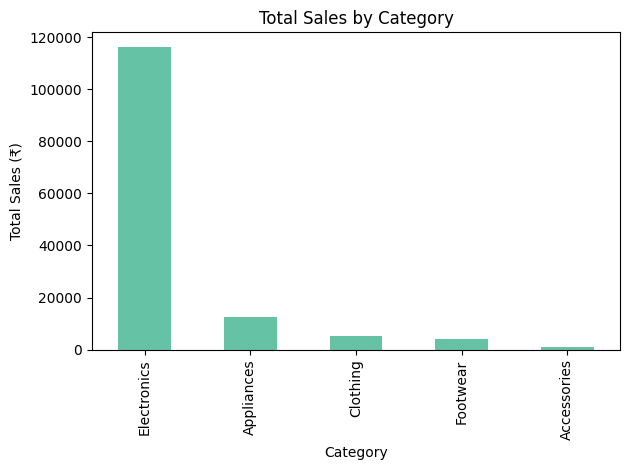

In [12]:
# total sales by product category
sales_by_category = df.groupby("Category")["TotalAmount"].sum().sort_values(ascending=False)
sales_by_category.plot(kind='bar', title="Total Sales by Category", colormap='Set2')
plt.ylabel("Total Sales (₹)")
plt.xlabel("Category")
plt.tight_layout()
plt.show()



/tmp/ipython-input-4095786713.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(x='PaymentMethod', data=df, palette='viridis')


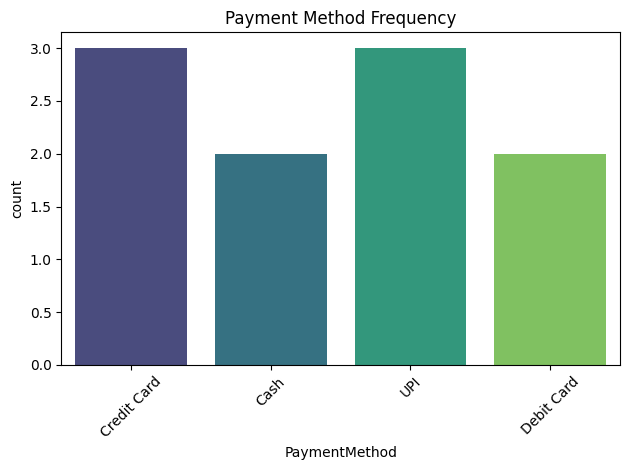

In [13]:
#payment method
sb.countplot(x='PaymentMethod', data=df, palette='viridis')
plt.title("Payment Method Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



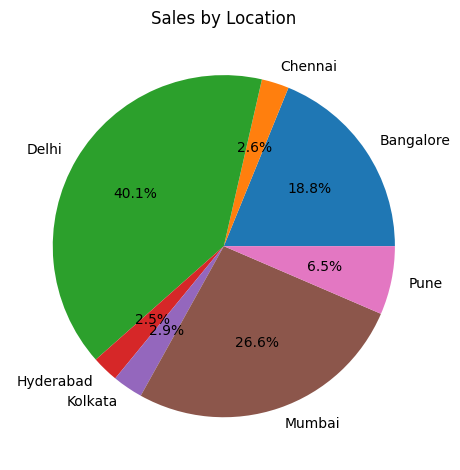

In [14]:
#location sales
location_sales = df.groupby("StoreLocation")["TotalAmount"].sum()
location_sales.plot(kind='pie', autopct='%1.1f%%', title="Sales by Location")
plt.ylabel("")
plt.tight_layout()
plt.show()


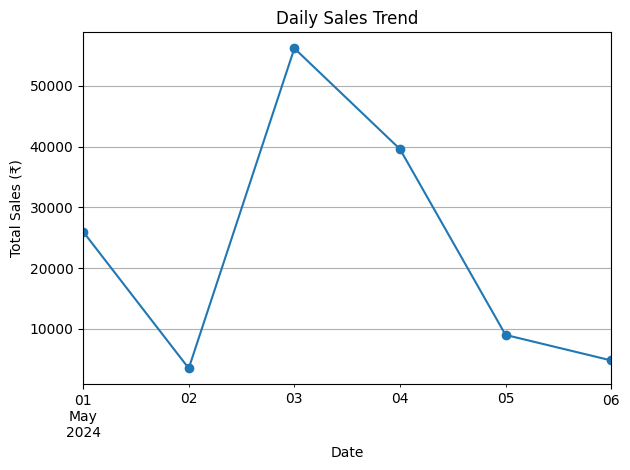

In [15]:
#daily sales trends
df['Date'] = pd.to_datetime(df['Date'])  # Convert to datetime
daily_sales = df.groupby('Date')['TotalAmount'].sum()
daily_sales.plot(marker='o', title="Daily Sales Trend")
plt.ylabel("Total Sales (₹)")
plt.xlabel("Date")
plt.grid(True)
plt.tight_layout()
plt.show()

In [16]:
#top 5 salling product
top_products = df.groupby('Product')['Quantity'].sum().sort_values(ascending=False).head(5)
print(top_products)


Product
Jeans           3
T-shirt         2
Smartphone      2
Shoes           2
Formal Shirt    1
Name: Quantity, dtype: int64


In [17]:
#avg sales
avg_sale_value = df['TotalAmount'].mean()
print(f"Average Sale Value: ₹{avg_sale_value:.2f}")


Average Sale Value: ₹13910.00
